 视频网站数据清洗整理和结论研究
 
 1、数据清洗 - 去除空值
 
 2、数据清洗 - 时间标签转化
 
 3、问题1 分析出不同导演电影的好评率，并筛选出TOP20
 
 4、问题2 统计分析2001-2016年每年评影人数总量


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False    # 用来正常显示负号

In [4]:
# 读取数据
path = r'C:\Users\HBlock\Desktop\DataFiles\爱奇艺视频数据.csv'
data = pd.read_csv(path, engine='python')
data.head(1)

,数据获取日期,演员,视频ID,详细链接,剧名,状态,类型,来源平台,整理后剧名,更新时间,...,上映年份,简介,导演,差评数,评分人数,播放量,更新至,总集数,第几季,好评数
0,2016年5月24日,NaN,100,http://www.iqiyi.com/dianshiju/douyu2.html,斗鱼Ⅱ(1-20)全集,已完结,粤语电视剧/偶像剧/言情剧/超清1080P,爱奇艺,斗鱼2,NaN,...,2004.0,在单子杀了阿豹派去强暴语燕的手下而入狱后，众人的生活都有了改变。语燕为了让自己不再是于皓的包...,NaN,2034.0,32722.0,8069526.0,NaN,20.0,2,30688.0


In [5]:
'''
    1、数据清洗 - 去除空值
    提示：fillna方法填充缺失数据，注意inplace参数
'''
def data_cleaning(df):
    """
    数据清洗 - 去除空值函数
    @param df: 数据data
    @return: 清洗后的数据
    """
    cols = df.columns
    for col in cols:
        if df[col].dtype == 'object':
            df[col].fillna('缺失数据',inplace = True)
        else:
            df[col].fillna(0,inplace = True)
    return df
data_c1 = data_cleaning(data)

In [6]:
'''
    数据清洗 - 时间标签转化
    将时间字段改为时间标签
    需要将中文日期转化为非中文日期，例如 2016年5月24日 → 2016.5.24
'''
def convert_time(df,*cols):
    """
     时间标签转化函数
    @param df: 数据data
    @param cols: 列名
    @return: 清洗后的数据
    """
    for col in cols:
        df[col] = df[col].str.replace('年','.')
        df[col] = df[col].str.replace('月','.')
        df[col] = df[col].str.replace('日','.')
        df[col] = pd.to_datetime(df[col])
    return df
data_c2 = convert_time(data_c1,'数据获取日期')

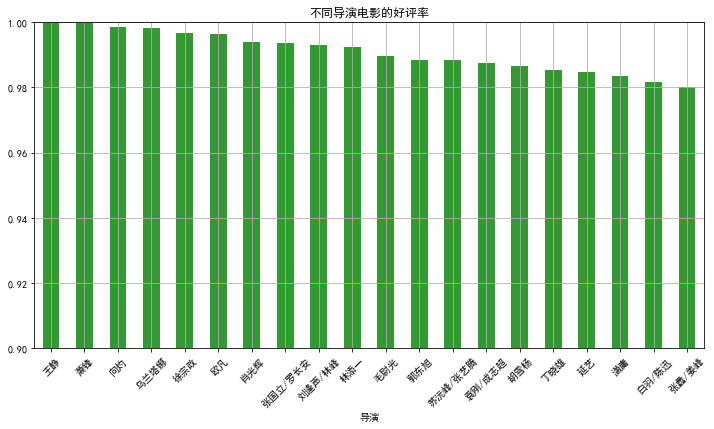

In [15]:
# 问题1 分析出不同导演电影的好评率，并筛选出TOP20
# 要求：
# ① 计算统计出不同导演的好评率，不要求创建函数
# ② 通过多系列柱状图，做图表可视化
# 提示：
# ① 好评率 = 好评数 / 评分人数


df_product = data_c2.groupby('导演')[['好评数','评分人数']].sum()
df_product['好评率'] = df_product['好评数']/df_product['评分人数']
df_sort = df_product.sort_values('好评率',ascending=False) # 降序排列


# 绘制柱状图  只绘制前20个
df_sort['好评率'][:20].plot(kind='bar',
                       grid=True,
                       alpha=0.8,
                       figsize=(12,6),
                       color='g',
                       rot=45,
                       ylim=[0.90,1],
                       title='不同导演电影的好评率')
plt.show()

<Figure size 720x576 with 0 Axes>

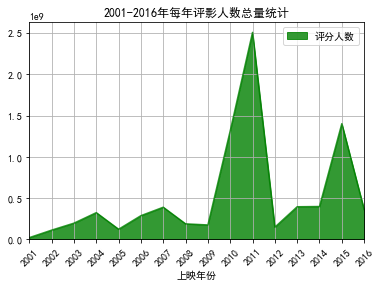

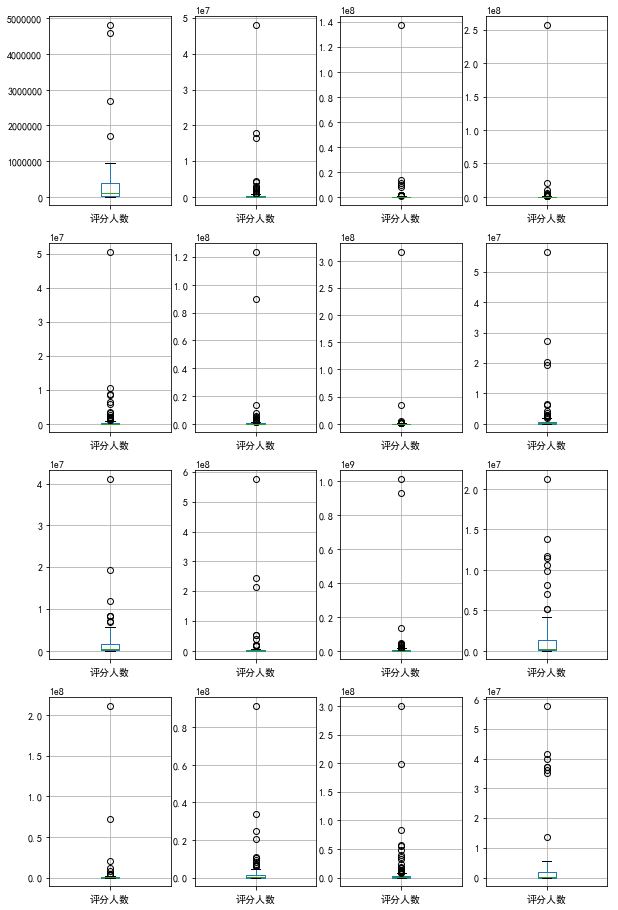

In [17]:
# 问题2 统计分析2001-2016年每年评影人数总量
# 要求：
# ① 计算统计出2001-2016年每年评影人数总量，不要求创建函数
# ② 通过面积图，做图表可视化，分析每年人数总量变化规律
# ③ 验证是否有异常值（极度异常）
# ④ 创建函数分析出数据外限最大最小值
# ⑤ 筛选查看异常值 → 是否异常值就是每年的热门电影？
# 提示：
# ① 通过箱型图验证异常值情况
# ② 通过quantile(q=0.5)方法，得到四分位数
# ③ IQR=Q3-Q1
# ④ 外限：最大值区间Q3+3IQR,最小值区间Q1-3IQR (IQR=Q3-Q1)

# 观察csv数据,发现同一部剧有几十个重复值(按'集'采集的数据,所以重复),因此需要清洗下重复数据
q2data1 = data_c2[['导演','整理后剧名','上映年份']]  # 
q2data1.sort_values('导演')[:20]  # 观察:结果都是重复值

# 开始清洗数据
q2data1 = q2data1.drop_duplicates()  # 去掉重复值
q2data1.sort_values('导演')[:20]  # 观察:发现年份有为0的数据,这些数据都无法计入统计
q2data1 = q2data1[q2data1['上映年份'] != 0]  # 去除‘上映年份’字段为0的数据

# 求出不同剧的评分人数、好评数总和
# q2data2 = q2data1.groupby('整理后剧名').sum()[['评分人数']]  # 不能用q2data1来sum,因为每一集视频都可能会有人评论,去掉重复项的q2data1求和不准确
q2data2 = data_c2.groupby('整理后剧名').sum()[['评分人数']]

# 合并数据，得到不同年份，不同剧的评分人数、好评数总和
q2data3 = pd.merge(q2data1,q2data2,left_on='整理后剧名',right_index=True)
# print('q2data3:',q2data3,sep='\n')

# 按照电影上映年份统计，评分人数量
q2data4 = q2data3.groupby('上映年份').sum()[['评分人数']]

# 绘制面积图
fig = plt.figure(figsize=(10,8))
q2data4.loc[2001:].plot.area(grid=True,alpha=0.8,color='g',rot=45)  # 2001年开始
plt.xticks(range(2001,2017))
plt.title('2001-2016年每年评影人数总量统计')  # 观察发现2010-2011年数据突增,是不是有异常值

# 存在异常值，哪些是异常值？每一年是不是都有?
fig,axes = plt.subplots(4,4,figsize=(10,16))  # 创建16个盒图来观察这16年的数据异常情况
start = 2001
for i in range(4):
    for j in range(4):
        data = q2data3[q2data3['上映年份'] == start]
        data[['评分人数']].boxplot(whis=3, # IQR为3,极度异常,默认为1.5
                               ax= axes[i,j])
        start += 1
plt.show()

In [9]:
# 根据个人经验,这些异常值可能当年非常受欢迎的电视剧,因此,对这些离群点进行分析下, 看猜测是否正确

def data_except_deal(df,col):
    """
    获取外限最大\最小值
    @param df: 数据data
    @param col: 列名
    @return: 
    """
    q1 = df[col].quantile(q=0.25)
    q3 = df[col].quantile(q=0.75)
    IQR = q3 - q1
    tmax = q3 + 3 * IQR  # 外限最大值
    tmin = q1 - 3 * IQR  # 外限最小值
    return (tmax,tmin)

# 测试
test_data = q2data3[q2data3['上映年份'] == 2011]
tmax = data_except_deal(test_data,'评分人数')[0]
guess_data =  test_data[test_data['评分人数'] > tmax]
guess_data  # 从结果中看到好多熟悉的电视剧,虽然没看过,但是特地去搜了下确实当年挺火的好像,尤其是步步惊心

,导演,整理后剧名,上映年份,评分人数
284,杨玄,千山暮雪,2011.0,1.734464e+07
311,延艺,盘龙卧虎高山顶,2011.0,3.934580e+07
337,李国立,步步惊心,2011.0,3.733689e+07
691,黄建中,王海涛今年41,2011.0,1.344592e+08
702,张国立,养父,2011.0,1.951364e+07
1083,于正/李慧珠,宫锁心玉,2011.0,9.324091e+08
1384,尚敬,大学生士兵的故事,2011.0,3.489208e+07
1446,林添一,回家的诱惑,2011.0,1.014866e+09
1689,王迎,家的n次方,2011.0,1.561293e+07
1750,沈怡,爱情睡醒了,2011.0,3.727770e+07


In [13]:
# 也可以将2001-2016年所有受欢迎的电视都输出
for i in range(2001,2017):
    datayear = q2data3[q2data3['上映年份'] == i]
    print(f'{i}年共有{len(datayear)}条受欢迎的电视剧')
    tmax = data_except_deal(datayear,'评分人数')[0]
    print(datayear[datayear['评分人数'] > tmax])
    print('-----------------------------------------------')

2001年共有49条受欢迎的电视剧
           导演   整理后剧名    上映年份       评分人数
1027       英达   东北1家人  2001.0  2674339.0
1338      王冀邢      黑冰  2001.0  1703364.0
1863      胡明凯  少年包青天2  2001.0  4809919.0
1972  陈家林、刘大印    康熙王朝  2001.0  4589462.0
-----------------------------------------------
2002年共有76条受欢迎的电视剧
          导演       整理后剧名    上映年份        评分人数
69       赵宝刚  拿什么拯救你我的爱人  2002.0   2184294.0
670      梁德龙       少年张3丰  2002.0  48030057.0
179      王文杰         大染坊  2002.0   1213903.0
542      高力强       乌龙闯情关  2002.0  17787335.0
560      胡雪杨        白领公寓  2002.0   1056247.0
705      刘家成    铁齿铜牙纪晓岚2  2002.0   4116280.0
711      张国立    康熙微服私访记4  2002.0   2430093.0
978       欧凡      我的淘气天使  2002.0   3100421.0
1026      英达     东北1家人续集  2002.0    832767.0
1118     王重光         半生缘  2002.0   1788765.0
1267   马骁/赵镭        乾隆王朝  2002.0   1807823.0
1533      沈庄        无敌县令  2002.0  16449254.0
1813      林龙       少年黄飞鸿  2002.0   4336169.0
26514    梁本熙        大汉天子  2002.0   2471649.0
------------------------------------